# Choix de la profondeur de la source 

Il s'agit d'optimiser les positions de la source et du flotteur sous différents profils de célérité.

- **Source** : de 0 à 100m
- **Flotteur** : de 100 à 500m
- 4 profils de Méditerrannée + 1 profil Gulf Stream

In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.flow import *
from clib.bellhop import *

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
s = bellhop({'mediterrannee': './SSP_4profils.mat'},name='med_2000m')
s.params

{'name': 'med_2000m',
 'freq': 3000.0,
 'zs': 50.0,
 'zmax': 2550.0,
 'rmax': 100.0,
 'NDepth': 2551.0,
 'NRange': 10001.0,
 'ALimites': [-15.0, 15.0],
 'file_type': 'R',
 'file_bathy': 'med_2000m.bty',
 'file_env': 'med_2000m.env',
 'file_ssp': 'med_2000m.ssp'}

## Création des fichiers environnement (.env)

Ici pour le profil de célérité 1, on créé les fichiers environnement (.env) suivant les paramètres choisis :
- la profondeur de la source (zs) varie. 
- on a deux types de fichiers (file_type) : 'R' pour les tracés de rayons et 'IB' pour les pertes par propagation.


In [3]:
issp=0                          # sound speed profile number
depth_source = [20.,70.,100.]   # list of chosen source depths

## 'R' files
s.params['file_type'] = 'R'
s.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=5, \
                        file_env = s.params['name']+'_SSP%d_%dm_%s.env' \
                        %(issp+1,i,s.params['file_type']))

## 'IB' files    
s.params['file_type'] = 'IB'
s.params['ALimites'] = [-90.0, 90.0]
for i in depth_source : 
    s.params['zs']=i
    s.generate_envfile('mediterrannee',Issp=issp, SSP_depth_step=5, \
                        file_env = s.params['name']+'_SSP%d_%dm_%s.env' \
                        %(issp+1,i,s.params['file_type']))
  

Output file is : med_2000m_SSP1_20m_R.env
Output file is : med_2000m_SSP1_70m_R.env
Output file is : med_2000m_SSP1_100m_R.env
Output file is : med_2000m_SSP1_20m_IB.env
Output file is : med_2000m_SSP1_70m_IB.env
Output file is : med_2000m_SSP1_100m_IB.env


On lance ensuite les simulations bellhop. on obtient les fichiers '.ray' et '.shd'.

## Résultats pour le profil 1 (thermocline à 60m)

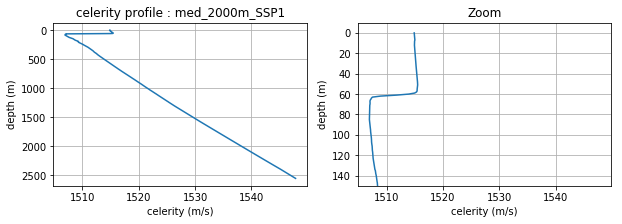

In [4]:
s.plotssp('mediterrannee', Issp=0)

### Source à 20m

- chenal de surface sur 30m de profondeur
- zones d'ombres importantes jusqu'à 600m de profondeur sur les zones 0-25km et 40-50km

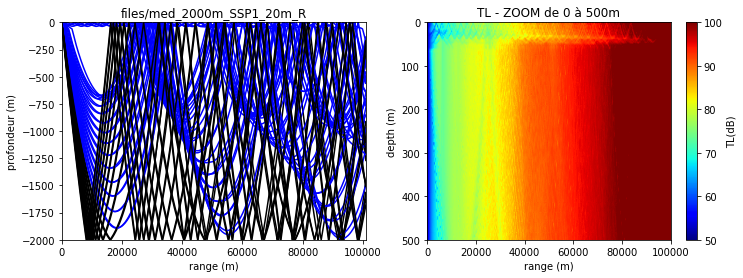

In [6]:
s.plot_all(file_ray = 'files/med_2000m_SSP1_20m_R.ray', \
           file_shd = 'files/med_2000m_SSP1_20m_IB.shd')

### Source à 70m

- Source environ à 10m sous de la thermocline. Résultats similaires pour une source plus profonde. 


- rayons réfractés sous la barre des 60m.
- pas de zones d'ombres pour des profondeurs de 100 à 500m (flotteur)

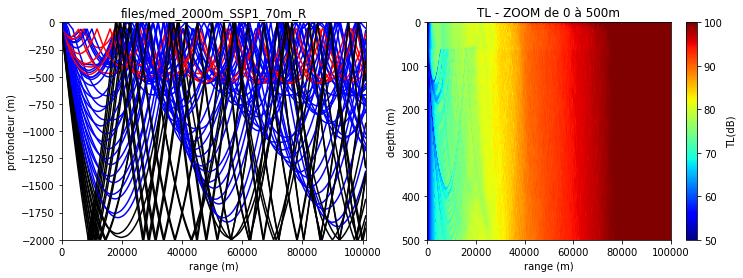

In [6]:
s.plot_all(file_ray = 'files/med_2000m_SSP1_70m_R.ray', \
           file_shd = 'files/med_2000m_SSP1_70m_IB.shd')

### Interprétation 

Dans le cas du profil 1, si l'on souhaite travailler avec un flotteur compris entre 100 et 500m de profondeur, il faut placer la source sous la thermocline. Jusqu'à quel range aura-t-on un signal détecté par le flotteur ?  

## Résultats pour le profil 2 (pas de thermocline)

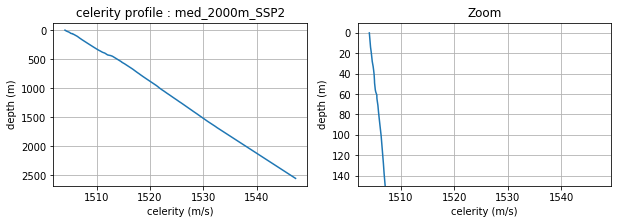

In [7]:
s.plotssp('mediterrannee', Issp=1)

### Source à 50m

- Résultats similaires pour toutes les profondeurs de source.

- Pas de grandes zones d'ombres pour des profondeurs de 100 à 500m (flotteur).

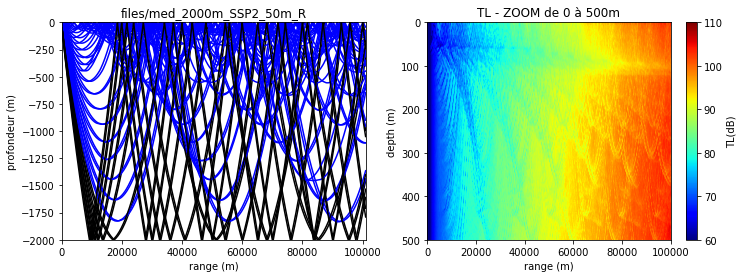

In [8]:
s.plot_all(file_ray = 'files/med_2000m_SSP2_50m_R.ray', \
           file_shd = 'files/med_2000m_SSP2_50m_IB.shd')

### Interprétation 

Dans le cas du profil 2, la profondeur de la source influe peu. La source, tout comme le flotteur, peuvent être placés à n'importe quelle profondeur (<500m). 

## Résultats pour le profil 3 (thermocline à 20m)

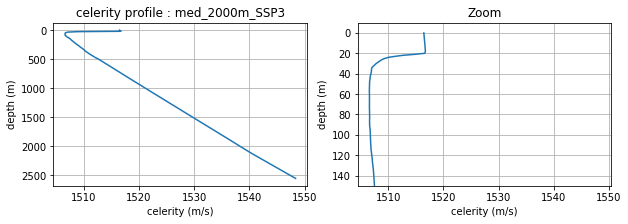

In [9]:
s.plotssp('mediterrannee', Issp=2)

### Source à 5m

- Zones d'ombres à 0-25km et 40-50km jusqu'à 700m de profondeur.

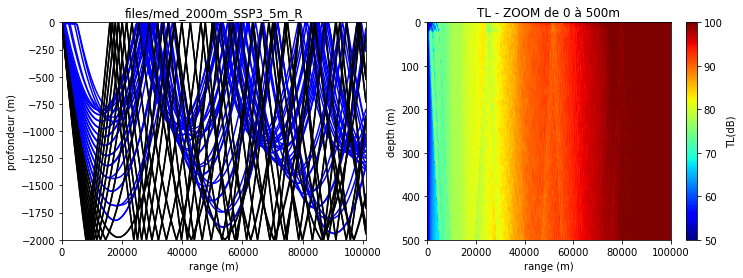

In [10]:
s.plot_all(file_ray = 'files/med_2000m_SSP3_5m_R.ray', \
           file_shd = 'files/med_2000m_SSP3_5m_IB.shd')

### Source à 30m

- Zone d'ombre sur les 10 premiers km jusqu'à environ 150m de profondeur (qui disparaît complètement quand la profondeur de la source augmente).
- Chenal de propagation entre 30 et 150m de profondeur. 


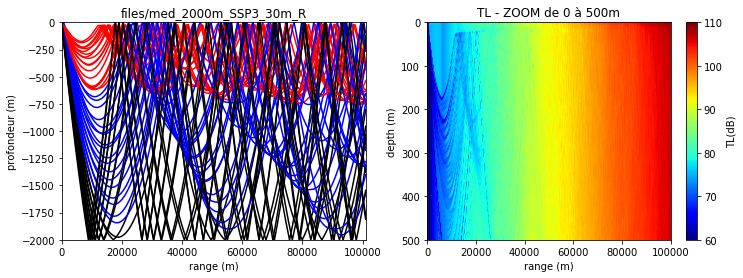

In [11]:
s.plot_all(file_ray = 'files/med_2000m_SSP3_30m_R.ray', \
           file_shd = 'files/med_2000m_SSP3_30m_IB.shd')

### Interprétation

La source doit être placée en dessous de la thermocline. Dans l'idéal le flotteur recevrait un meilleur signal dans le chenal de 30 à 150m de profondeur. Cependant, il peut aussi être placé en dessous de 150m.

## Résultats pour le profil 4 (température élevée en surface)

Pour le profil 4, la célérité décroît jusqu'à 50m de profondeur, puis le gradient devient positif. 

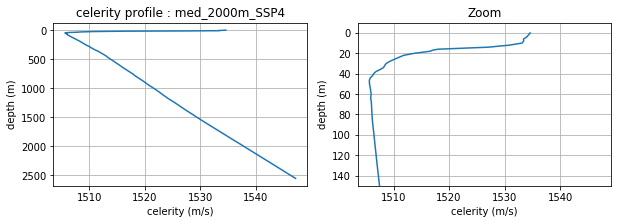

In [12]:
s.plotssp('mediterrannee', Issp=3)

### Source à 5m

- Pas de rayons réfractés, zones d'ombre.

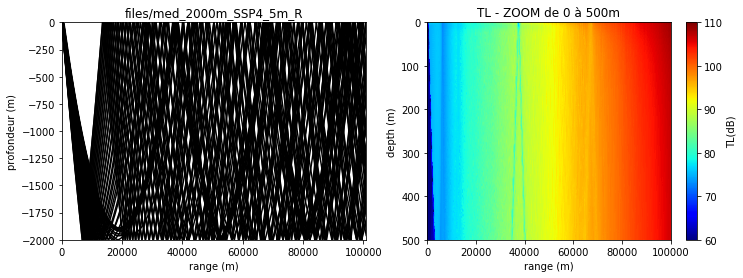

In [13]:
s.plot_all(file_ray = 'files/med_2000m_SSP4_5m_R.ray', \
           file_shd = 'files/med_2000m_SSP4_5m_IB.shd')

### Source à 20m

- Présence de rayons réfractés mais zone d'ombre de 0-30km sur 500m de profondeur. 


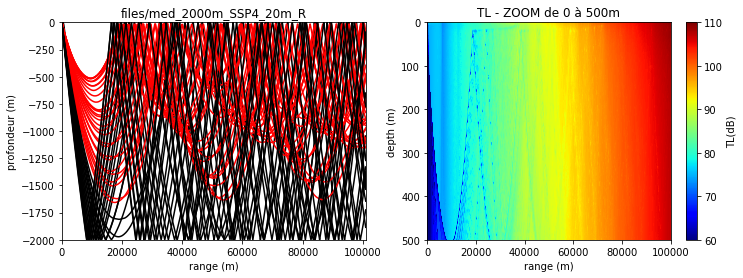

In [14]:
s.plot_all(file_ray = 'files/med_2000m_SSP4_20m_R.ray', \
           file_shd = 'files/med_2000m_SSP4_20m_IB.shd')

### Source à 60m

- Source située à 10m sous le minimum de célérité. Résultats similaires pour des profondeurs supérieures. 

- Nombreux rayons réfractés pour des profondeurs supérieures à 50m. 

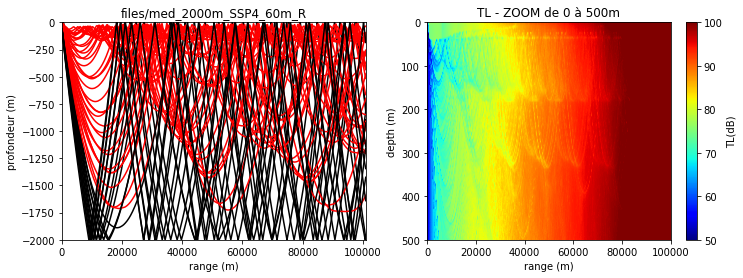

In [15]:
s.plot_all(file_ray = 'files/med_2000m_SSP4_60m_R.ray', \
           file_shd = 'files/med_2000m_SSP4_60m_IB.shd')

### Interprétation 

La source doit être placée en dessous de la profondeur à laquelle le gradient de célérité s'inverse (ici 50m). Le flotteur doit lui aussi être placé endessous de cette profondeur.  

## Résultats pour le profil du Gulf Stream


1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00060.nc


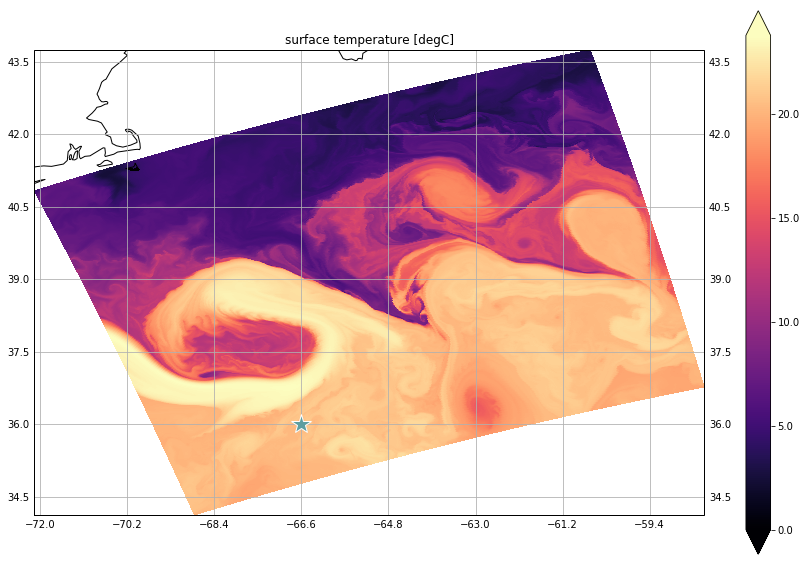

In [3]:
g = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'lon': -66.6, \
                    'lat': 36., 'plot_map': True}}, zmax = 4900)

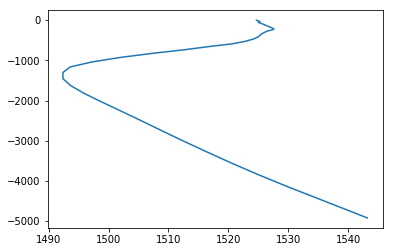

In [4]:
plt.plot(g.SSP['gs']['c'][0,:], -g.SSP['gs']['depth'][:])
#g.plotssp('gs')

In [5]:
g.params

{'name': 'simulation',
 'freq': 3000.0,
 'zs': 50.0,
 'zmax': 4900,
 'rmax': 100.0,
 'NDepth': 4901.0,
 'NRange': 10001.0,
 'ALimites': [-15.0, 15.0],
 'file_type': 'R',
 'file_bathy': 'simulation.bty',
 'file_env': 'simulation.env',
 'file_ssp': 'simulation.ssp'}

## Création des fichiers environnement (.env)

In [12]:
issp=0                          # sound speed profile number
depth_source = [5.,50.,100.]   # list of chosen source depths

## 'R' files
g.params['file_type'] = 'R'
g.params['ALimites'] = [-15.0, 15.0]
for i in depth_source : 
    g.params['zs']=i
    g.generate_envfile('gs', file_env = 'gulf_stream'+'_%dm_%s.env' \
                        %(i, g.params['file_type']))

## 'IB' files    
g.params['file_type'] = 'IB'
g.params['ALimites'] = [-90.0, 90.0]
for i in depth_source : 
    g.params['zs']=i
    g.generate_envfile('gs', file_env = 'gulf_stream'+'_%dm_%s.env' \
                        %(i, g.params['file_type']))
  

Output file is : gulf_stream_5m_R.env
Output file is : gulf_stream_50m_R.env
Output file is : gulf_stream_100m_R.env
Output file is : gulf_stream_5m_IB.env
Output file is : gulf_stream_50m_IB.env
Output file is : gulf_stream_100m_IB.env


### Source à 5m

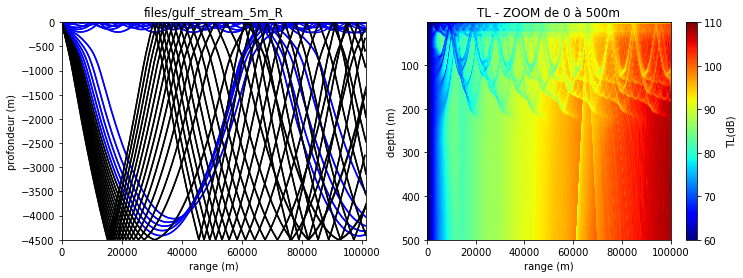

In [6]:
g.plot_all(file_ray = 'files/gulf_stream_5m_R.ray', \
           file_shd = 'files/gulf_stream_5m_IB.shd')

### Source à 50m

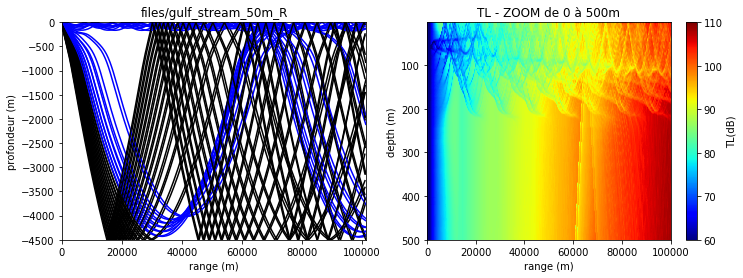

In [7]:
g.plot_all(file_ray = 'files/gulf_stream_50m_R.ray', \
           file_shd = 'files/gulf_stream_50m_IB.shd')

### Source à 100m

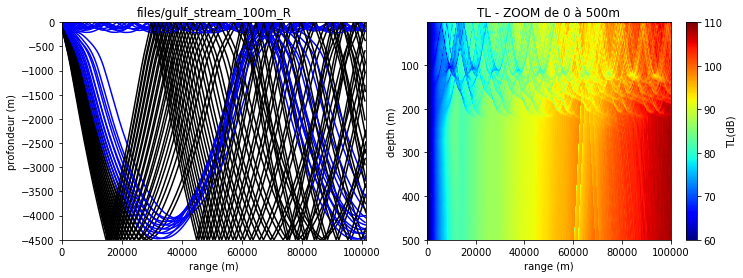

In [9]:
g.plot_all(file_ray = 'files/gulf_stream_100m_R.ray', \
           file_shd = 'files/gulf_stream_100m_IB.shd')

### Interprétation

- Rayons réfractés sur 200m de profondeur, mais nombreuses zones d'ombres. 
- Absence de rayons réfractés sur la tranche 200-500m.
- Une zone de résurgence à 65-70km.
